In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!gdown 1-hISmbzmhuJaySCv4g0fn95pU1G9GtWa

Downloading...
From: https://drive.google.com/uc?id=1-hISmbzmhuJaySCv4g0fn95pU1G9GtWa
To: /content/test_data_1.jpg
100% 835k/835k [00:00<00:00, 67.6MB/s]


In [3]:
!pip install -q easyocr

# Use EasyOCR to extract text

In [4]:
import easyocr

def ocr_image(image_path):
    reader = easyocr.Reader(["en"])
    result = reader.readtext(image_path)
    return result

['CAC MAT HANG Vhut', 'PuLULUL', 'BAN: DO CHAY BIA NUOC NGOT', '816 805', '8865 712 70', 'XUAN', 'THANH PHO DONG XOAI', "DT:' 0328", 'Wic', 'D', '2 - KUAN LOC', 'PHUONG TAN', '{er iger', 'COSy', 'DIeM !', 'Wd', '4j', 'RINH XE Ve NHA', 'KhanG di#H', 'GCLTReng', '~eRUtuRE', 'LAELA', "'WW-", 'Lamaeh WW=', 'Dlnn Heneken', 'BIA W', 'Heineken', 'BIA VIET', 'BIA VIET', 'Tger', 'BIAV', 'Heineken', 'BIA VIET', 'BIAE', 'Chdine', 'Heineken', 'BIAVIET', 'Tiger ', 'BIAV', 'Banc', 'Tiger', 'Tiger', 'BIAVIET', 'Chpune', 'ChQLE', 'Heineken', 'BIA VIET', 'BIA', 'T8e=', 'Tger |Heineken', 'Ho', 'BIAVI', 'B,Nc', 'Tiger_', 'Tiger', 'BIAVIET', 'G', 'Quuc', 'BIA VIET', 'Totr', 'Guolpack"', 'Heineken', 'Mo ', 'BAn', 'BIA VIET', 'QubL', 'CNM', 'BIA VIET', 'BIA VIET', 'MUi', "Tiger'", "Tiger'", 'Goolpacit', 'Heineken', '350,000', 'BAN ', 'BIA VIET', '(Loduna', 'cuplne:_', 'BIA VIET', 'BIA VIET', 'MoI=', 'Tiger P', 'Tiger', 'Goolpach=', 'BAn_', 'Heineken]', 'BaMo)', 'BIRVIET', 'ChcR,', 'BIA VIET', 'BIAVIET', 'Ho

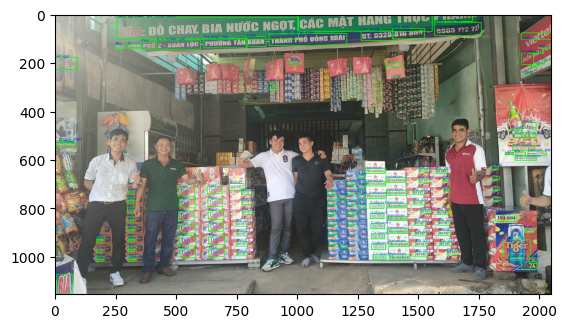

In [5]:
import cv2
from matplotlib import pyplot as plt

img_path = "/content/test_data_1.jpg"
mat = cv2.imread(img_path)
result = ocr_image(img_path)


boxes = [line[0] for line in result]
texts = [line[1] for line in result]
scores = [line[2] for line in result]

for box, text in zip(boxes, texts):
    top_left     = (int(box[0][0]), int(box[0][1]))
    bottom_right = (int(box[2][0]), int(box[2][1]))

    cv2.rectangle(mat, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(mat, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

mat = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
print(texts)
plt.imshow(mat)

YOLO Count People

In [6]:
!pip install torch torchvision torchaudio
!pip install yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.0.1
    Uninstalling Pillow-10.0.1:
      Successfully uninstalled Pillow-10.0.1

requirements: AutoUpdate success ✅ 21.0s, installed 1 package: ['pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-6-29 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
image 1/1: 1155x2048 90 beer_kegs, 3 consumers, 15 heineken_logos, 1 signage, 4 staffs, 9 tiger_logos
Speed: 4.5ms pre-process, 630.6ms inference, 9.7ms NMS per image at shape (1, 3, 384, 640)


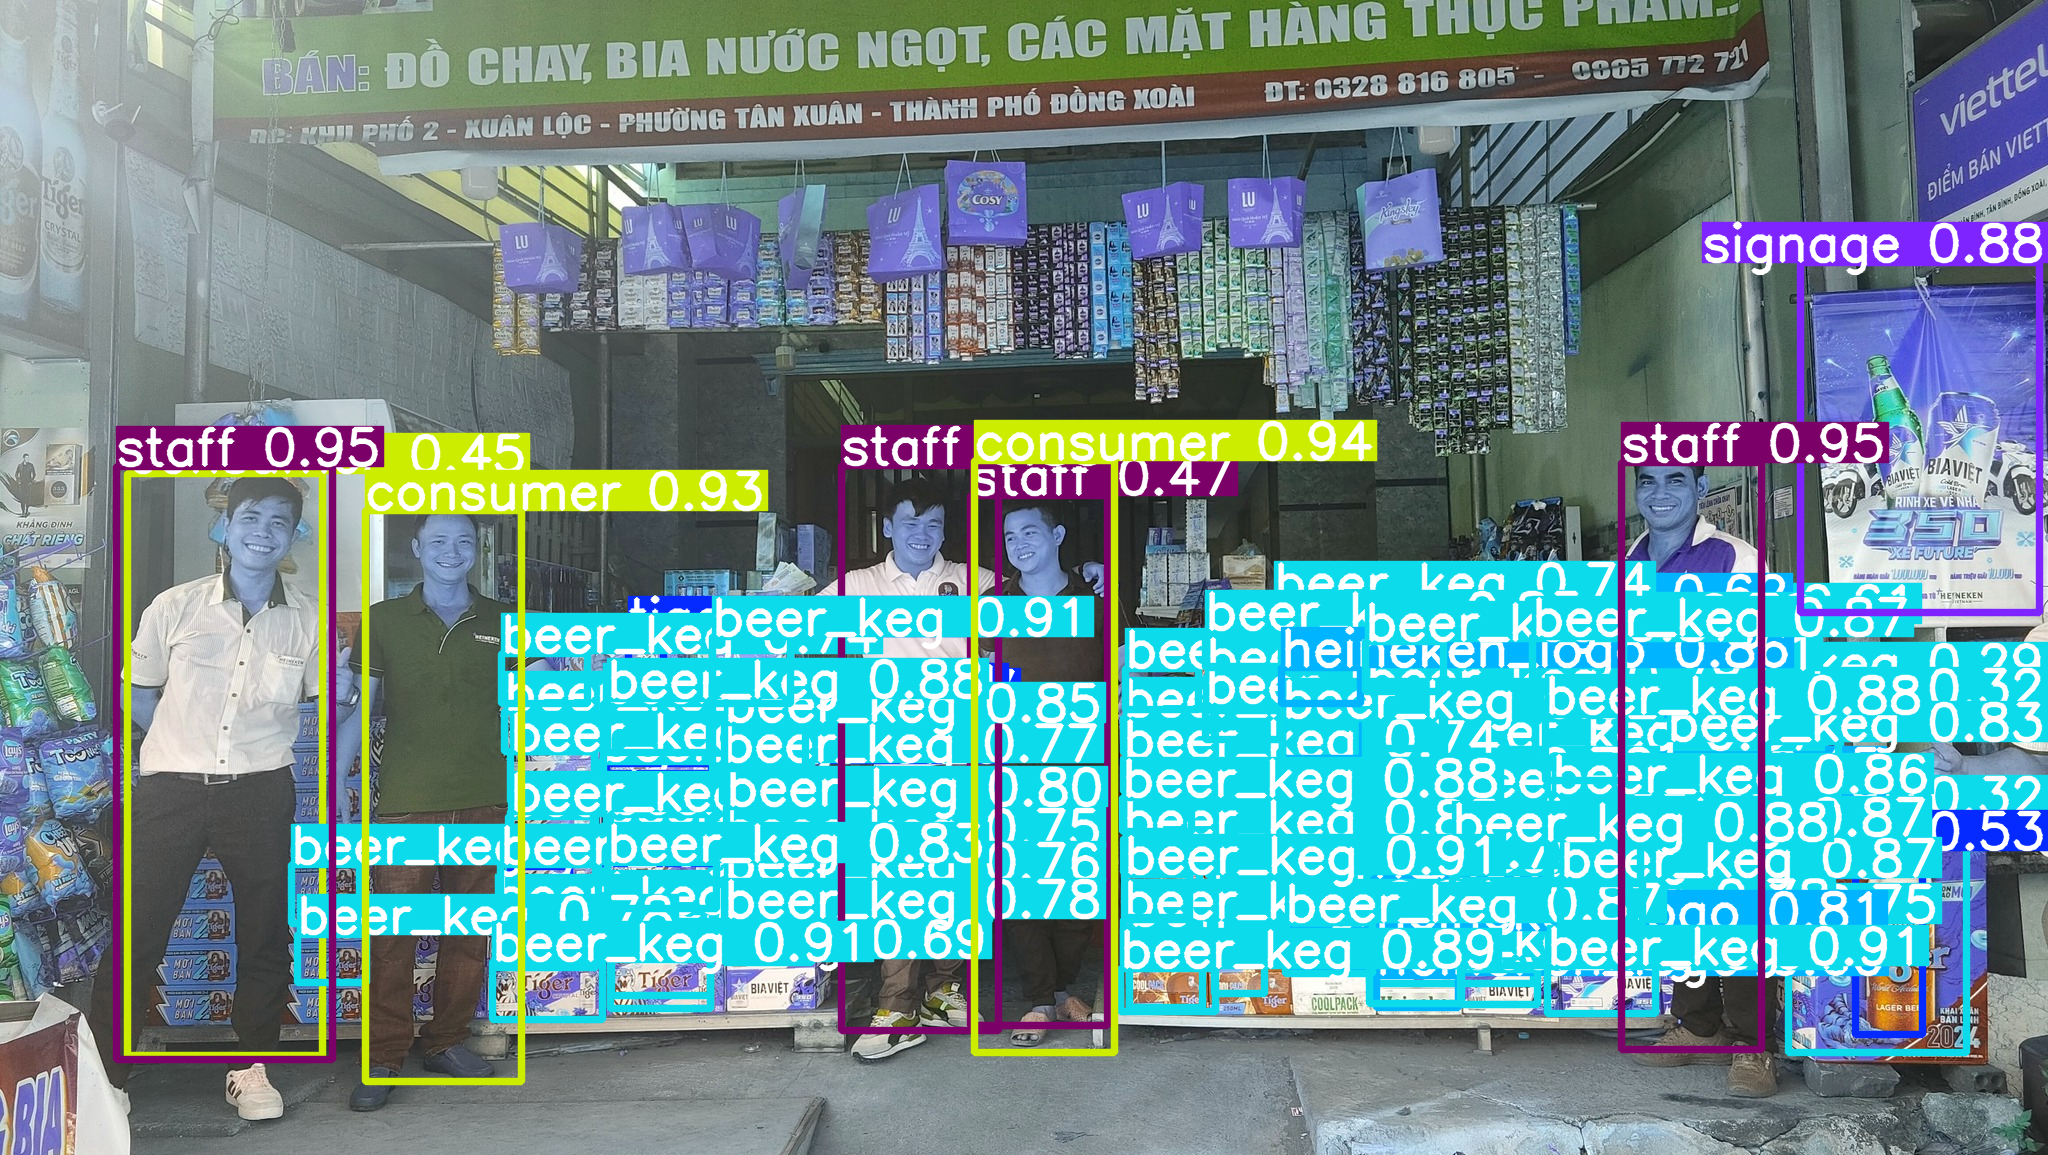

Saved 1 image to path/to/save/results8


            xmin        ymin         xmax         ymax  confidence  class  \
0     116.031113  466.821594   332.306396  1059.572754    0.951627     16   
1    1621.162354  462.709076  1761.769775  1049.175171    0.949466     16   
2     974.424500  460.987488  1114.263428  1052.432617    0.940576      7   
3     365.467896  510.921783   521.029968  1081.987793    0.930963      7   
4    1124.859497  874.856079  1189.821777   917.794128    0.911010      1   
..           ...         ...          ...          ...         ...    ...   
117   628.645569  636.484985   663.212036   671.808472    0.276905     20   
118  1370.653320  854.692261  1452.446045   952.462402    0.272540      1   
119   618.533447  708.809937   675.785767   742.988770    0.272494     20   
120   722.578674  835.867065   816.117798   912.320618    0.259464      1   
121  1482.577271  635.738037  1525.949341   664.192993    0.259345     20   

           name  
0         staff  
1         staff  
2      consumer  
3  

In [7]:
import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/hackhcm/Yolov5 100ep 21cls base.pt')

# Load image
img_path = '/content/test_data_1.jpg'
img = cv2.imread(img_path)

# Perform inference
results = model(img)

# Print results
results.print()  # or results.show() to display image with detections

# To show the image with bounding boxes
results.show()

# Alternatively, you can save the results
results.save(save_dir=Path('path/to/save/results'))

# If you need the detected results as a DataFrame
df = results.pandas().xyxy[0]  # bounding box coordinates, confidence, class, name
print(df)

filtered_df = df[df['confidence'] > 0.6]

# Create a summary DataFrame with class name, quantity, and average confidence
summary_df = filtered_df.groupby('name').agg(
    quantity=('name', 'size'),
    confidence=('confidence', 'mean')
).reset_index()

# Print the summary DataFrame
print(summary_df)

# Save the summary to a CSV file
output_csv_path = '/content/summary_results.csv'
summary_df.to_csv(output_csv_path, index=False)
print(f"Summary saved to {output_csv_path}")



In [9]:
brand_Logos("Heineken")

{'logo_name': 'Heineken'}

# Using image captioning model

In [10]:
import cv2
from transformers import pipeline
from PIL import Image
import numpy as np

# Initialize the image captioning pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [11]:
img = Image.open("/content/test_data_1.jpg").convert("RGB")

# Generate a description for the image
description = pipe(img)

In [12]:
description

[{'generated_text': 'a group of men standing in front of a store'}]

# Using LLM to combine the result

Các bạn lấy API key của Groq tại link này: [https://console.groq.com/keys](https://console.groq.com/keys)

**LLM Reflecction**

# Simple streamlit app

In [8]:
!pip install -q streamlit

In [9]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.987s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [31]:
%%writefile app.py
import streamlit as st
import easyocr
import numpy as np
from PIL import Image
import requests
import json
from transformers import pipeline
from groq import Groq
import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Initialize the OCR reader
ocr_reader = easyocr.Reader(["en"])

def get_image_caption(image):
    # Use a pre-trained image captioning model from Salesforce
    caption_pipeline = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
    return caption_pipeline(image)[0]['generated_text']

def perform_ocr(image):
    result = ocr_reader.readtext(np.array(image))
    ocr_texts = [line[1] for line in result]
    return ocr_texts

def analyze_image_information(image_description, ocr_results):
    prompt = f"""
    Analyze the following image information and provide insights based on the criteria given below:

    Image Description:
    {image_description}

    OCR Results:
    {ocr_results}

    Criteria:
    1. Brand Logos: Identify any brand logos mentioned in the description or OCR results.
    2. Products: Mention any products such as beer kegs and bottles.
    3. Customers: Describe the number of customers, their activities, and emotions.
    4. Promotional Materials: Identify any posters, banners, and billboards.
    5. Setup Context: Determine the scene context (e.g., bar, restaurant, grocery store, or supermarket).

    Insights:
    """

    # Replace with your Groq API key

    client = Groq(
        # This is the default and can be omitted
        api_key="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",
    )


    data = {
        "model": "llama3-8b-8192",
        "messages": [{"role": "user", "content": prompt}]
    }

    chat_completion = client.chat.completions.create(**data)
    return chat_completion.choices[0].message.content


# Streamlit app
st.set_page_config(layout="wide")
st.title("📷 Image Analysis App")

# Create three columns with custom widths
col1, col2, col3 = st.columns([1, 2, 2])

with col1:
    st.header("Upload Image")
    uploaded_file = st.file_uploader("Choose an image file", type=["jpg", "jpeg", "png"])

with col2:
    st.header("OCR and Description")

    if uploaded_file is not None:

        # Load YOLOv5 model
        model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/hackhcm/Yolov5 100ep 21cls base.pt')

        # Load image
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)


        # Perform inference
        results = model(img)

        # Print results
        results.print()  # or results.show() to display image with detections

        # To show the image with bounding boxes
        st.write(results.show())

        # Alternatively, you can save the results
        # results.save(save_dir=Path('path/to/save/results'))

        # If you need the detected results as a DataFrame
        # df = results.pandas().xyxy[0]  # bounding box coordinates, confidence, class, name
        # print(df)




        # # Load the image
        # image = Image.open(uploaded_file).convert("RGB")
        # st.image(image, caption='Uploaded Image', use_column_width=True)

        # # Get image caption
        # st.subheader("Image Description")
        # image_description = get_image_caption(image)
        # st.write(image_description)

        # # # Perform OCR
        # # st.subheader("OCR Texts")
        # ocr_texts = perform_ocr(image)
        # # for text in ocr_texts:
        # #     st.write(text)

with col3:
    st.header("Analysis")

    if uploaded_file is not None:
        # Analyze image information
        # ocr_results = ' '.join(ocr_texts)
        # analysis = analyze_image_information(image_description, ocr_results)
        # st.write(analysis)

        filtered_df = df[df['confidence'] > 0.6]

        # Create a summary DataFrame with class name, quantity, and average confidence
        summary_df = filtered_df.groupby('name').agg(
            quantity=('name', 'size'),
        ).reset_index()

        # Print the summary DataFrame
        print(summary_df)
        st.table(summary_df)


Overwriting app.py


In [32]:
!streamlit run app.py &>/content/logs.txt &

In [26]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.83.43.61


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.956s
your url is: https://afraid-lines-pay.loca.lt


Knowledge Graphs for RAG

In [ ]:
!pip install langchain-community -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 10.5 MB/s eta 0:00:00


In [28]:
!cp "/content/Yolov5 100ep 21cls base.pt" "/content/drive/MyDrive/hackhcm"